<a href="https://colab.research.google.com/github/abdelrahman233/cv/blob/main/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading packages and libraries
!pip install scikit-surprise
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import mae, rmse

# Load the datasets
# Load dataset
final_books = pd.read_csv('/content/drive/MyDrive/Data set/Final_data.csv',on_bad_lines='skip', encoding='latin1')
# Handle missing values (example: fill NaNs with empty string)
final_books.fillna('', inplace=True)
final_books.rename(columns={'ï»¿author': 'author'}, inplace=True)




ratings = pd.read_csv('/content/drive/MyDrive/Data set/Ratings.csv', on_bad_lines='skip', encoding='latin1')
final_books.columns = final_books.columns.str.strip()
ratings.columns = ratings.columns.str.strip()
final_books.rename(columns={'ï»¿book_Id': 'book_id'}, inplace=True)


# Print the column names again to confirm
print("\nBooks DataFrame columns after stripping spaces:")
print(final_books.columns)

print("\nRatings DataFrame columns after stripping spaces:")
print(ratings.columns)

# Display the first few rows of each dataset
print("Books Data:")
print(final_books.head())

print("\nRatings Data:")
print(ratings.head())












Books DataFrame columns after stripping spaces:
Index(['author', 'desc', 'genre', 'img', 'isbn13', 'rating', 'title',
       'book_id'],
      dtype='object')

Ratings DataFrame columns after stripping spaces:
Index(['book_id', 'user_id', 'rating'], dtype='object')
Books Data:
                             author  \
0              Laurence M. Hauptman   
1  Charlotte Fiell,Emmanuelle Dirix   
2                     Andy Anderson   
3              Carlotta R. Anderson   
4                     Jean Leveille   

                                                desc  \
0  Reveals that several hundred thousand Indians ...   
1  Fashion Sourcebook - 1920s is the first book i...   
2  The seminal history and analysis of the Hungar...   
3  "All-American Anarchist" chronicles the life a...   
4  AujourdÃ¢â¬â¢hui, lÃ¢â¬â¢oiseau nous invit...   

                                               genre  \
0  History,Military History,Civil War,American Hi...   
1          Couture,Fashion,Historical

Explanatory Data Analysis


First few rows of the dataset:
                             author  \
0              Laurence M. Hauptman   
1  Charlotte Fiell,Emmanuelle Dirix   
2                     Andy Anderson   
3              Carlotta R. Anderson   
4                     Jean Leveille   

                                                desc  \
0  Reveals that several hundred thousand Indians ...   
1  Fashion Sourcebook - 1920s is the first book i...   
2  The seminal history and analysis of the Hungar...   
3  "All-American Anarchist" chronicles the life a...   
4  AujourdÃ¢â¬â¢hui, lÃ¢â¬â¢oiseau nous invit...   

                                               genre  \
0  History,Military History,Civil War,American Hi...   
1          Couture,Fashion,Historical,Art,Nonfiction   
2                                   Politics,History   
3                                      Labor,History   
4                                                      

                                                 img    isbn

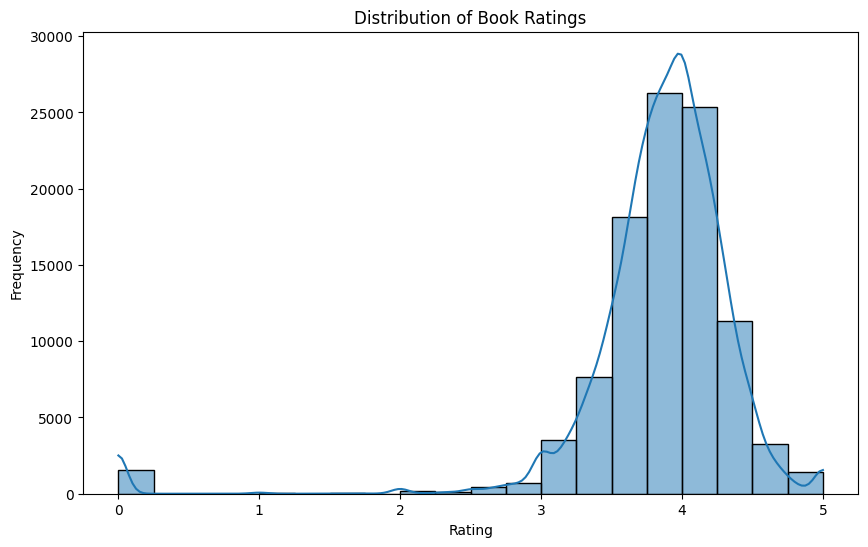

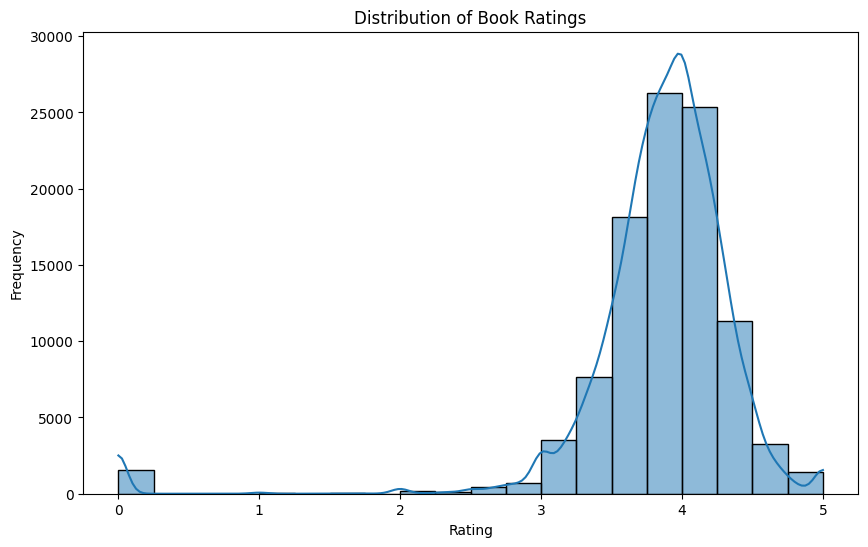

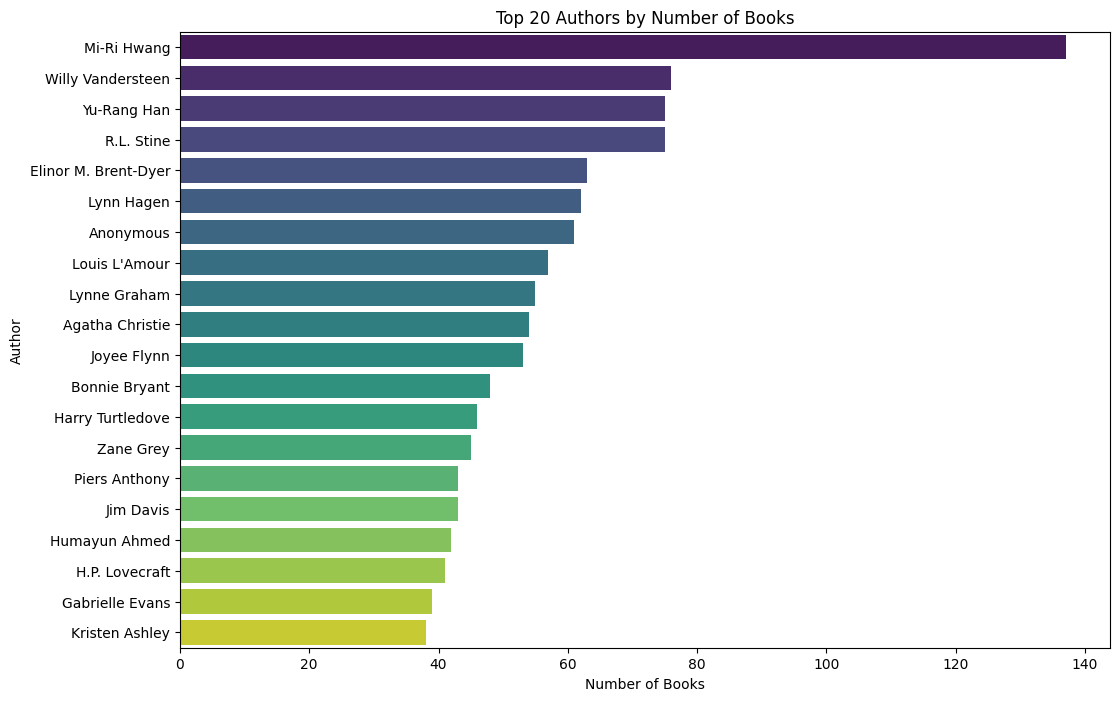

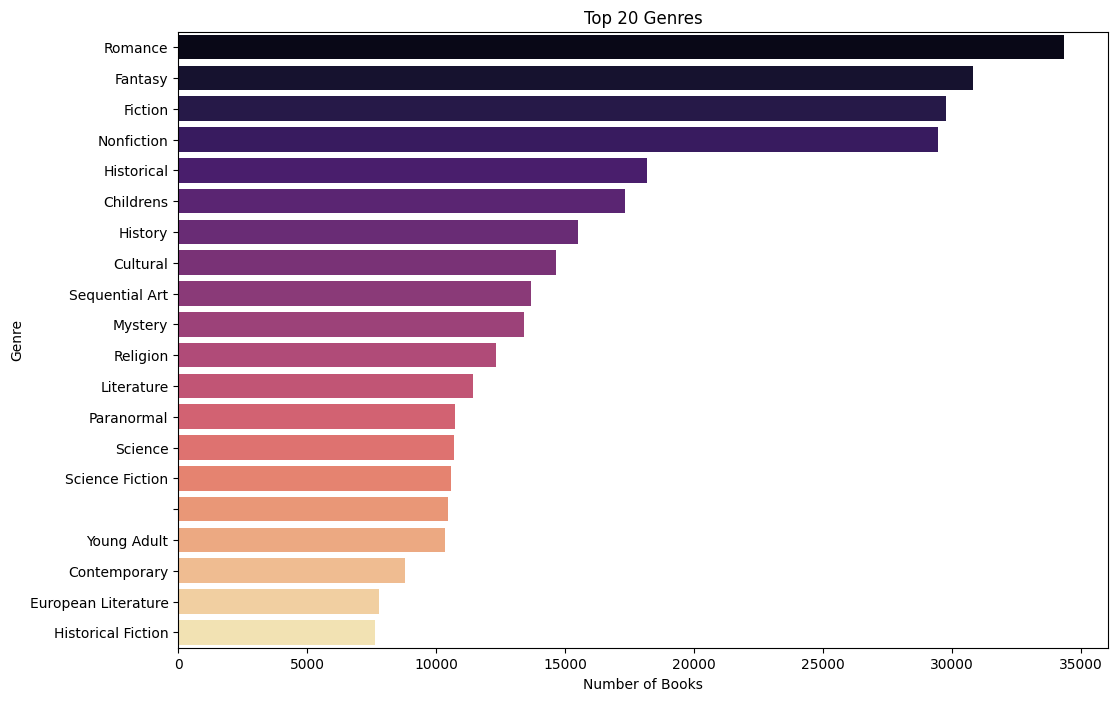

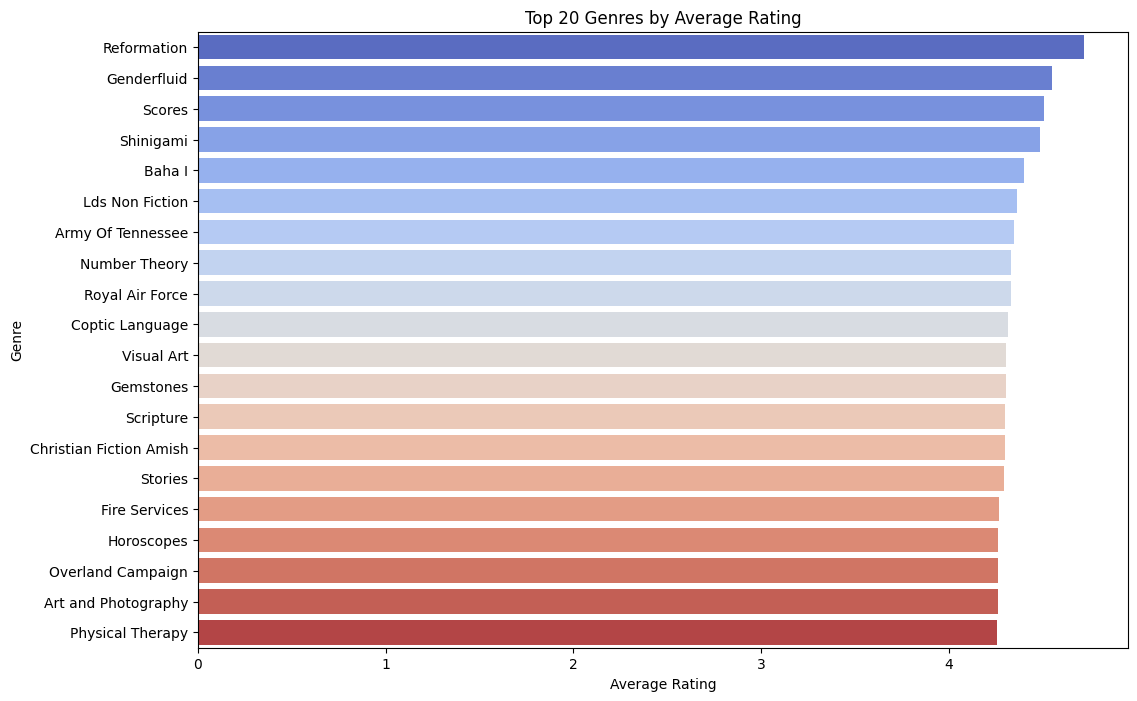

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


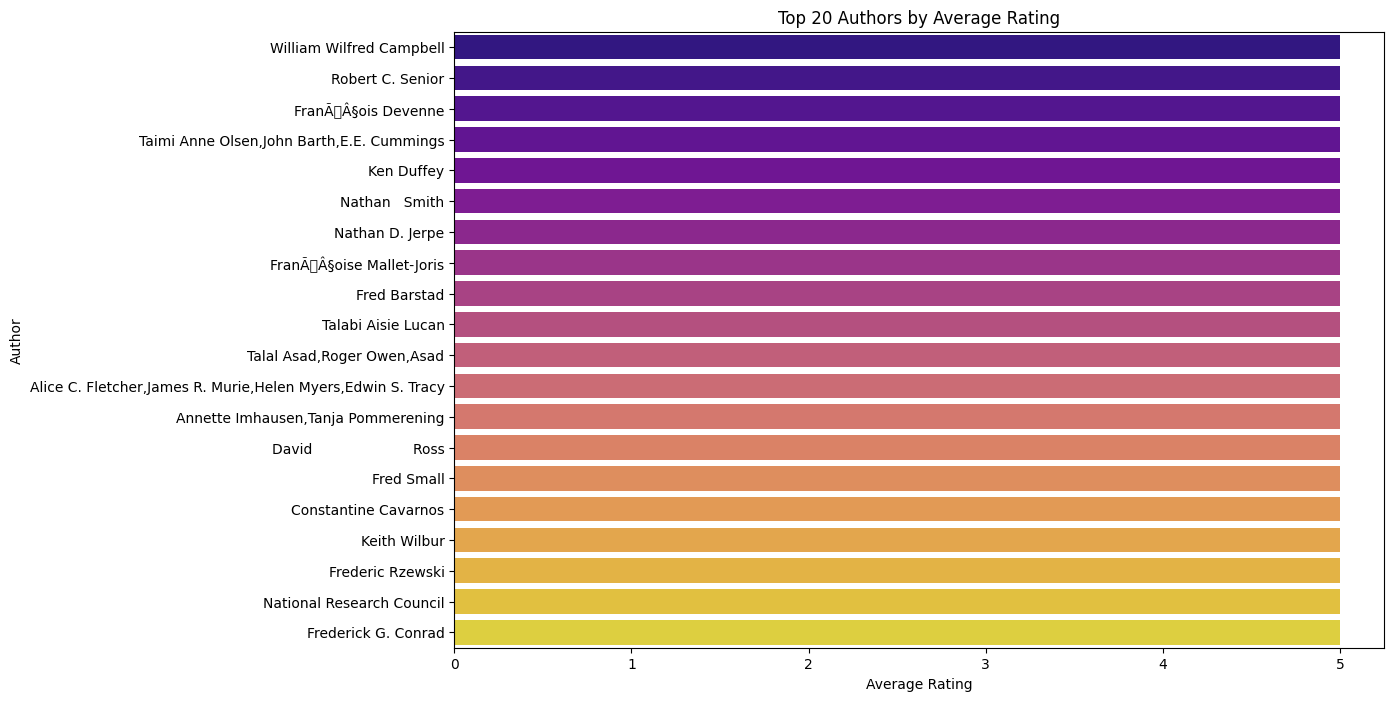

In [ ]:
# Handle missing values (example: fill NaNs with empty string)
final_books.fillna('', inplace=True)
final_books.rename(columns={'ï»¿author': 'author'}, inplace=True)
final_books.rename(columns={'ï»¿book_Id': 'book_id'}, inplace=True)

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(final_books.head())

# Check for missing values
print("\nMissing values in each column:")
print(final_books.isnull().sum())

# Get basic statistics
print("\nBasic statistics of numerical columns:")
print(final_books.describe())

# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(final_books['rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(final_books['rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
# Count the number of books per author
author_counts = final_books['author'].value_counts().head(20)

# Plot the top 20 authors by number of books
# Plot the top 20 authors by number of books
plt.figure(figsize=(12, 8))
sns.barplot(y=author_counts.index, x=author_counts.values, hue=author_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# Split the genres by comma and explode into separate rows
genres_exploded = final_books.assign(genre=final_books['genre'].str.split(',')).explode('genre')

# Count the number of occurrences of each genre
genre_counts = genres_exploded['genre'].value_counts().head(20)

# Plot the top 20 genres
# Plot the top 20 genres
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, hue=genre_counts.index, palette='magma', dodge=False, legend=False)
plt.title('Top 20 Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()
# Calculate the average rating for each genre
avg_rating_by_genre = genres_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False).head(20)

# Plot the average rating by genre
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_genre.index, x=avg_rating_by_genre.values, hue=avg_rating_by_genre.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Top 20 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Calculate the average rating for each author
avg_rating_by_author = final_books.groupby('author')['rating'].mean().sort_values(ascending=False).head(20)

# Plot the average rating by author
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_by_author.index, x=avg_rating_by_author.values, hue=avg_rating_by_author.index, palette='plasma', dodge=False, legend=False)
plt.title('Top 20 Authors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.show()








In [ ]:
# Content-Based Filtering
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Load dataset
final_books = pd.read_csv('/content/drive/MyDrive/Data set/Final_data.csv',on_bad_lines='skip', encoding='latin1')

# Handle missing values (example: fill NaNs with empty string)
final_books.fillna('', inplace=True)
final_books.rename(columns={'ï»¿author': 'author'}, inplace=True)

print(final_books.columns)
# Index(['ï»¿author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13',
#        'link', 'pages', 'rating', 'reviews', 'title', 'totalratings'],
#       dtype='object')

final_books['combined_features'] = final_books['title'] +  ' ' + final_books['genre'] + ' ' + final_books['author'].fillna('')+ ' ' + final_books['desc']

# Split the data to create a test set (20%)
test_data = final_books.sample(frac=0.2, random_state=42)
train_data = final_books.drop(test_data.index)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the combined features
count_matrix = count_vectorizer.fit_transform(final_books['combined_features'])

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the count matrix to get the TF-IDF matrix
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

def compute_cosine_similarity(tfidf_matrix, idx, top_n=10):
    # Compute the cosine similarity of the book with index idx to all other books
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Get the top_n most similar books
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    similar_scores = cosine_similarities[similar_indices]

    return similar_indices, similar_scores

# Example of getting recommendations for a sample book
sample_idx = final_books[final_books['book_id'] == 560].index[0]
similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, sample_idx)

# Get the recommended books
recommended_books = final_books.iloc[similar_indices]
def get_recommendations(book_id, top_n=10):
    # Get the index of the book that matches the title
    idx = final_books[final_books['book_id'] == book_id].index[0]
    # Compute the cosine similarity and get the top_n most similar books
    similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, idx, top_n)

    # Return the top_n most similar books
    return final_books.iloc[similar_indices]

# Get recommendations for a sample book
sample_recommendations = get_recommendations(560)
print("Recommended books: ")
print(sample_recommendations['book_id'])




Index(['author', 'desc', 'genre', 'img', 'isbn13', 'rating', 'title',
       'book_id'],
      dtype='object')
Recommended books: 
72621    72623
14558    14560
32891    32893
83037    83039
34975    34977
52471    52473
52470    52472
14075    14077
3871      3873
74222    74224
Name: book_id, dtype: int64


Index(['author', 'desc', 'genre', 'img', 'isbn13', 'rating', 'title',
       'book_id'],
      dtype='object')
Test Precision: 1.00
Test Recall: 0.90
Test Mean Average Precision (MAP): 1.00
Cross-Validated Precision: 1.00
Cross-Validated Recall: 0.94
Cross-Validated Mean Average Precision (MAP): 1.00
Precision: 1.00
Recall: 0.90
Mean Average Precision (MAP): 1.00


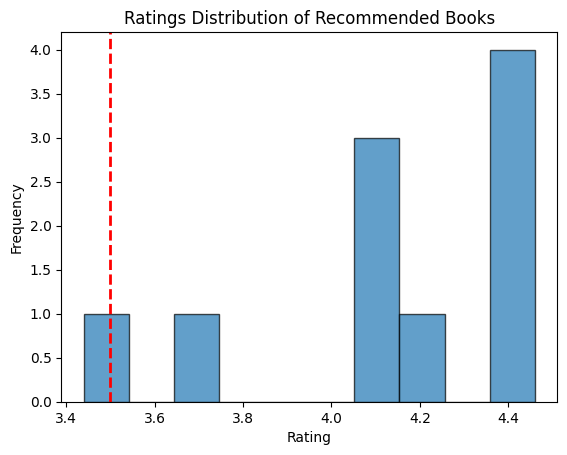

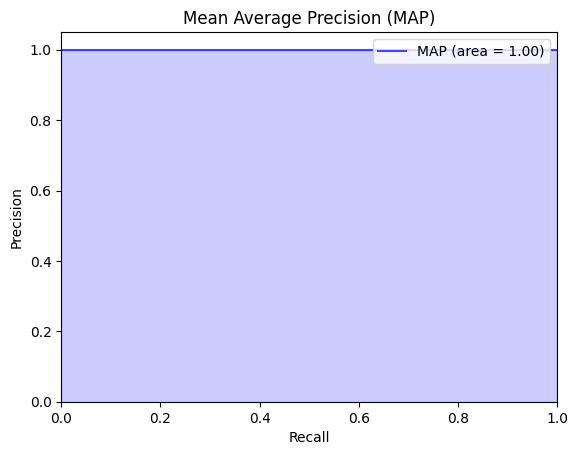

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Split the data to create a test set (20%)
test_data = final_books.sample(frac=0.2, random_state=42)
train_data = final_books.drop(test_data.index)
# Initialize CountVectorizer and TfidfTransformer
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
tfidf_transformer = TfidfTransformer()
final_books['combined_features'] = final_books['title'] +  ' ' + final_books['genre'] + ' ' + final_books['author'].fillna('')+ ' ' + final_books['desc']

# final_books['combined_features'] = final_books['title'] + ' ' + final_books['author'] + ' ' + final_books['genres'] + ' ' + final_books['characters']

# Generate the count matrix and the TF-IDF matrix for the entire dataset
count_matrix = count_vectorizer.fit_transform(final_books['combined_features'])
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)


# Compute cosine similarity function
def compute_cosine_similarity(tfidf_matrix, idx, top_n=10):
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    similar_scores = cosine_similarities[similar_indices]
    return similar_indices, similar_scores

# Function to get recommendations using book_id
def get_recommendations(book_id, top_n=10):
    # Get the index of the book in the original dataset
    idx = final_books[final_books['book_id'] == book_id].index[0]

    # Compute the cosine similarity and get the top_n most similar books
    similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, idx, top_n)

    # Return the top_n most similar books
    return final_books.iloc[similar_indices]

# Evaluate the recommendations
def evaluate_recommendations(recommendations, threshold=3.5):
    actual_ratings = recommendations['rating'].values
    binary_ratings = np.where(actual_ratings >= threshold, 1, 0)
    precision = precision_score(np.ones(len(binary_ratings)), binary_ratings)
    recall = recall_score(np.ones(len(binary_ratings)), binary_ratings)
    average_precision = average_precision_score(np.ones(len(binary_ratings)), actual_ratings)
    return precision, recall, average_precision

# Example: Get recommendations for a sample book in the test set
sample_book_id = test_data['book_id'].iloc[0]
test_recommendations = get_recommendations(sample_book_id)

# Evaluate the recommendations on the test set
precision, recall, average_precision = evaluate_recommendations(test_recommendations)

# Print evaluation metrics for the test set
print(f'Test Precision: {precision:.2f}')
print(f'Test Recall: {recall:.2f}')
print(f'Test Mean Average Precision (MAP): {average_precision:.2f}')
from sklearn.model_selection import cross_val_score, KFold
def evaluate_recommendations(recommendations, threshold=3.5):
    # Get the actual ratings of the recommended books
    actual_ratings = recommendations['rating'].values

    # Convert ratings to binary values based on the threshold
    binary_ratings = np.where(actual_ratings >= threshold, 1, 0)

    # For simplicity, assume all recommended books are relevant
    # Precision: TP / (TP + FP)
    precision = precision_score(np.ones(len(binary_ratings)), binary_ratings)

    # Recall: TP / (TP + FN)
    recall = recall_score(np.ones(len(binary_ratings)), binary_ratings)

    # Average Precision (for MAP)
    average_precision = average_precision_score(np.ones(len(binary_ratings)), actual_ratings)

    return precision, recall, average_precision

# Define a function to compute recommendations for cross-validation
def compute_cv_recommendations(tfidf_matrix, book_id, top_n=10):
    idx = final_books[final_books['book_id'] == book_id].index[0]
    similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, idx, top_n)
    return final_books.iloc[similar_indices]

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
precisions, recalls, average_precisions = [], [], []

for train_index, test_index in kf.split(final_books):
    train_data = final_books.iloc[train_index]
    test_data = final_books.iloc[test_index]

    # Create TF-IDF matrices for train and test
    train_count_matrix = count_vectorizer.fit_transform(train_data['combined_features'])
    train_tfidf_matrix = tfidf_transformer.fit_transform(train_count_matrix)

    test_count_matrix = count_vectorizer.transform(test_data['combined_features'])
    test_tfidf_matrix = tfidf_transformer.transform(test_count_matrix)

    # Get recommendations for a sample book in the test set
    sample_book_id = test_data['book_id'].iloc[0]
    test_recommendations = compute_cv_recommendations(test_tfidf_matrix, sample_book_id)

    # Evaluate recommendations
    precision, recall, average_precision = evaluate_recommendations(test_recommendations)

    precisions.append(precision)
    recalls.append(recall)
    average_precisions.append(average_precision)

# Calculate mean metrics
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_average_precision = np.mean(average_precisions)

# Print cross-validated metrics
print(f'Cross-Validated Precision: {mean_precision:.2f}')
print(f'Cross-Validated Recall: {mean_recall:.2f}')
print(f'Cross-Validated Mean Average Precision (MAP): {mean_average_precision:.2f}')



# Function to evaluate the recommendations


# Evaluate the recommendations
# Evaluate the recommendations on the test set
precision, recall, average_precision = evaluate_recommendations(test_recommendations)


# Print evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Mean Average Precision (MAP): {average_precision:.2f}')
# Graphical representation of ratings
def plot_ratings_distribution(recommendations):
    plt.hist(recommendations['rating'], bins=10, edgecolor='k', alpha=0.7)
    plt.axvline(x=3.5, color='r', linestyle='--', linewidth=2)
    plt.title('Ratings Distribution of Recommended Books')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

# Plot ratings distribution of the recommendations
plot_ratings_distribution(sample_recommendations)
# Plot MAP curve
def plot_map_curve(average_precision):
    plt.figure()
    plt.step([0, 1], [average_precision, average_precision], where='post', color='b', alpha=0.7, label=f'MAP (area = {average_precision:.2f})')
    plt.fill_between([0, 1], [average_precision, average_precision], step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Mean Average Precision (MAP)')
    plt.legend(loc='upper right')
    plt.show()

# Plot the MAP curve
plot_map_curve(average_precision)


In [ ]:
# Prepare the dataset for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Train the SVD model
model = SVD(n_factors=20, biased=True, random_state=42)
model.fit(trainset)
# Make predictions on the test set
predictions = model.test(testset)

# # Calculate MAE and RMSE
# mae_score = mae(predictions)
# rmse_score = rmse(predictions)
# print(f'MAE: {mae_score}')
# print(f'RMSE: {rmse_score}')


def get_book_recommendations(user_id, model, books_df, top_n=10):
    # Get a list of all book IDs
    all_book_ids = books_df['book_id'].unique()

    # Predict ratings for all books for the given user
    predictions = [model.predict(user_id, book_id) for book_id in all_book_ids]

    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N book IDs
    top_book_ids = [pred.iid for pred in predictions[:top_n]]

    # Return the recommended books
    recommended_books = books_df[books_df['book_id'].isin(top_book_ids)]
    return recommended_books[['book_id', 'title']]

# Example usage
# Api take ratings csv , response book_id , message for less than 10 books
user_id = 68  # replace with a user_id from your dataset
if user_id in ratings['user_id'].unique():
    recommendations = get_book_recommendations(user_id, model, final_books, top_n=10)
    print("Recommended Books:")
    print(recommendations)
else:
    print(f"User ID {user_id} not found in the dataset.")
user_rated_books = ratings[ratings['user_id'] == user_id].merge(final_books, on='book_id')[['title','book_id']]
print("User Rated Books:")
print(user_rated_books)
#############################################################


Recommended Books:
      book_id                                              title
190       192  Johnny One-Eye: A Tale of the American Revolution
1306     1308                                 The Taking of Eden
3626     3628               Numbers and Deuteronomy for Everyone
4481     4483                                  An Imprudent Lady
4866     4868  Tomorrow's Garden: Design and Inspiration for ...
5205     5207                             Whimsical Little Knits
5578     5580    Hard-Boiled Wonderland and the End of the World
6588     6590      Cuba Diaries: An American Housewife in Havana
6918     6920              Art of the Andes: From Chavin to Inca
9840     9842                Island Wineries of British Columbia
User Rated Books:
                                               title  book_id
0                         Nightmares and Dreamscapes     8882
1  A Fine Romance: Hollywood/Broadway (The Magic....     9858


In [ ]:
#EVALUATIONS
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error,mean_absolute_error, precision_recall_fscore_support

# Predict ratings for the test set using Collaborative Filtering
# Calculate MAE and RMSE
mae_score = mae(predictions)
rmse_score = rmse(predictions)
print(f'MAE: {mae_score}')
print(f'RMSE: {rmse_score}')
# Calculate Precision, Recall, and F1 score
# We'll consider ratings >= 4 as relevant (positive class)

# Convert predictions and true ratings to binary relevance
threshold = 3
y_true = [1 if true_r >= threshold else 0 for (_, _, true_r, _, _) in predictions]
y_pred = [1 if est >= threshold else 0 for (_, _, _, est, _) in predictions]

# Calculate precision, recall, and f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


MAE:  0.6549
RMSE: 0.8382
MAE: 0.6549211701758678
RMSE: 0.8382459754664113
Precision: 0.931023600145495
Recall: 0.9674233244772502
F1 Score: 0.9488745086708353


In [ ]:
!pip install flask
from flask import Flask, request, jsonify

# Initialize Flask app
app = Flask(__name__)

# Content-Based Filtering
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = count_vectorizer.fit_transform(final_books['combined_features'])
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

def compute_cosine_similarity(tfidf_matrix, idx, top_n=10):
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    similar_scores = cosine_similarities[similar_indices]
    return similar_indices, similar_scores

def get_content_recommendations(book_id, top_n=10):
    idx = final_books[final_books['book_id'] == book_id].index[0]
    similar_indices, similar_scores = compute_cosine_similarity(tfidf_matrix, idx, top_n)
    return final_books.iloc[similar_indices][['book_id', 'isbn13']]

# Collaborative Filtering
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
model = SVD(n_factors=20, biased=True, random_state=42)
model.fit(trainset)

def get_collaborative_recommendations(user_id, top_n=10):
    all_book_ids = final_books['book_id'].unique()
    predictions = [model.predict(user_id, book_id) for book_id in all_book_ids]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_book_ids = [pred.iid for pred in predictions[:top_n]]
    return final_books[final_books['book_id'].isin(top_book_ids)][['book_id', 'isbn13']]

@app.route('/content-based', methods=['GET'])
def content_based():
    book_id = int(request.args.get('book_id'))
    recommendations = get_content_recommendations(book_id)
    return jsonify(recommendations.to_dict(orient='records'))

@app.route('/collaborative', methods=['GET'])
def collaborative():
    user_id = int(request.args.get('user_id'))
    recommendations = get_collaborative_recommendations(user_id)
    return jsonify(recommendations.to_dict(orient='records'))

if __name__ == '__main__':
    app.run(debug=True)

#TestCases:curl "http://127.0.0.1:5000/content-based?book_id=560"
#curl "http://127.0.0.1:5000/collaborative?user_id=68"
